In [38]:
%matplotlib inline

from __future__ import print_function

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [39]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST", one_hot=True)
data.test.cls = np.array([label.argmax() for label in data.test.labels])
# print (data.test.cls[0:5])

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [40]:
image_size = 28
image_flat = image_size * image_size
image_shape = (image_size, image_size)
num_class = 10

In [41]:
def plot_images(image, cls_true, cls_pred=None):
    assert len(image) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(image[i].reshape(image_shape), cmap='binary')
        if cls_pred is None:
            xlabel = "True:{0}".format(cls_true[i])
        else:
            xlabel = "True:{0}, Pred:{1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

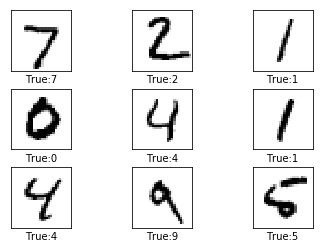

In [42]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images, cls_true)

In [43]:
x = tf.placeholder(tf.float32, [None, image_flat])
y = tf.placeholder(tf.float32, [None, num_class])
y_true = tf.placeholder(tf.float32, [None, num_class])
y_true_cls = tf.placeholder(tf.int64, [None])
weights = tf.Variable(tf.zeros([image_flat, num_class]))
biases = tf.Variable(tf.zeros([num_class]))
logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
correct_prediction = tf.equal(y_true_cls, y_pred_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [44]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
batch_size = 100

In [45]:
def optimize(num_iterations):
    x_batch, y_batch = data.train.next_batch(batch_size)
    feed_dict = {x: x_batch, y_true: y_batch}
    sess.run(optimizer, feed_dict=feed_dict)

In [46]:
feed_dict_test = {x: data.test.images, y_true: data.test.labels, y_true_cls: data.test.cls}

In [47]:
def print_accuracy():
    acc = sess.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [48]:
def print_confusion_matrix():
    cls_true = data.test.cls
    correct, cls_pred = sess.run([correct_prediction, y_pred_cls], feed_dict=feed_dict_test)
    
    cm = confusion_matrix(y_true=cls_true, y_pred=cls_pred)
    print (cm)
    
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_class)
    plt.xticks(tick_marks, range(num_class))
    plt.yticks(tick_marks, range(num_class))
    plt.xlabel("Predict")
    plt.ylabel("True")

In [49]:
def plot_example_error():
    correct, cls_pred = sess.run([correct_prediction, y_pred_cls], feed_dict=feed_dict_test)
    incorrect = correct == False
    images = data.test.images[incorrect]
    cls_true = data.test.cls[incorrect]
    plot_images(images[0:9], cls_true[0:9], cls_pred[0:9])

In [50]:
def plot_weight():
    weight = sess.run(weights)
    vmax = np.max(weight)
    vmin = np.min(weight)
    
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, axe in enumerate(axes.flat):
        if i < 10:
            image = weight[:, i].reshape(image_shape)
            axe.imshow(image, vmin=vmin, vmax=vmax, cmap='seismic')
            axe.set_xlabel("Weights:{0}".format(i))
        axe.set_xticks([])
        axe.set_yticks([])

Accuracy on test-set: 47.2%


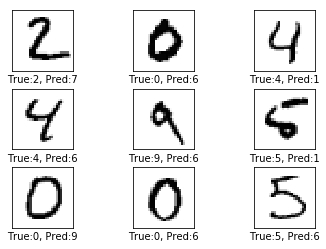

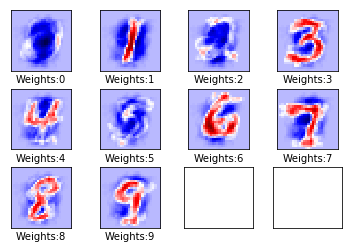

In [51]:
optimize(1)
print_accuracy()
plot_example_error()
plot_weight()

Accuracy on test-set: 43.8%


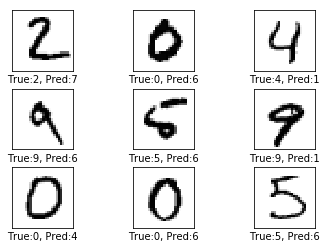

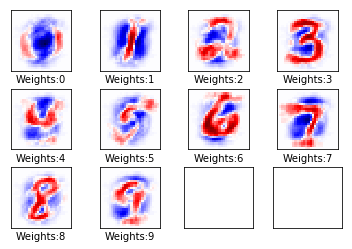

In [52]:
optimize(9)
print_accuracy()
plot_example_error()
plot_weight()

Accuracy on test-set: 44.0%


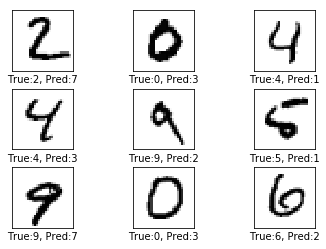

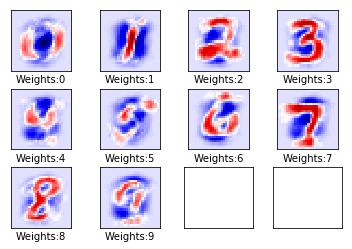

In [53]:
optimize(990)
print_accuracy()
plot_example_error()
plot_weight()

In [54]:
# print_confusion_matrix()
# plot_example_error()
# plot_weight()

In [55]:
sess.close()